Use Cases to Discuss with ESS:

1.  **Test Case Generation:** Generate test cases based on BRD/solution documents.
2.  **Visual Test Case Generation:** Automate the generation of test cases for visual testing.
3.  **AI-Driven Test Data Generation:** Generate synthetic test data for diverse testing scenarios.

---

## 1. **Test Case Generation:** Generate test cases based on BRD/solution documents.

### Saleor e-commerce (hosted locally)

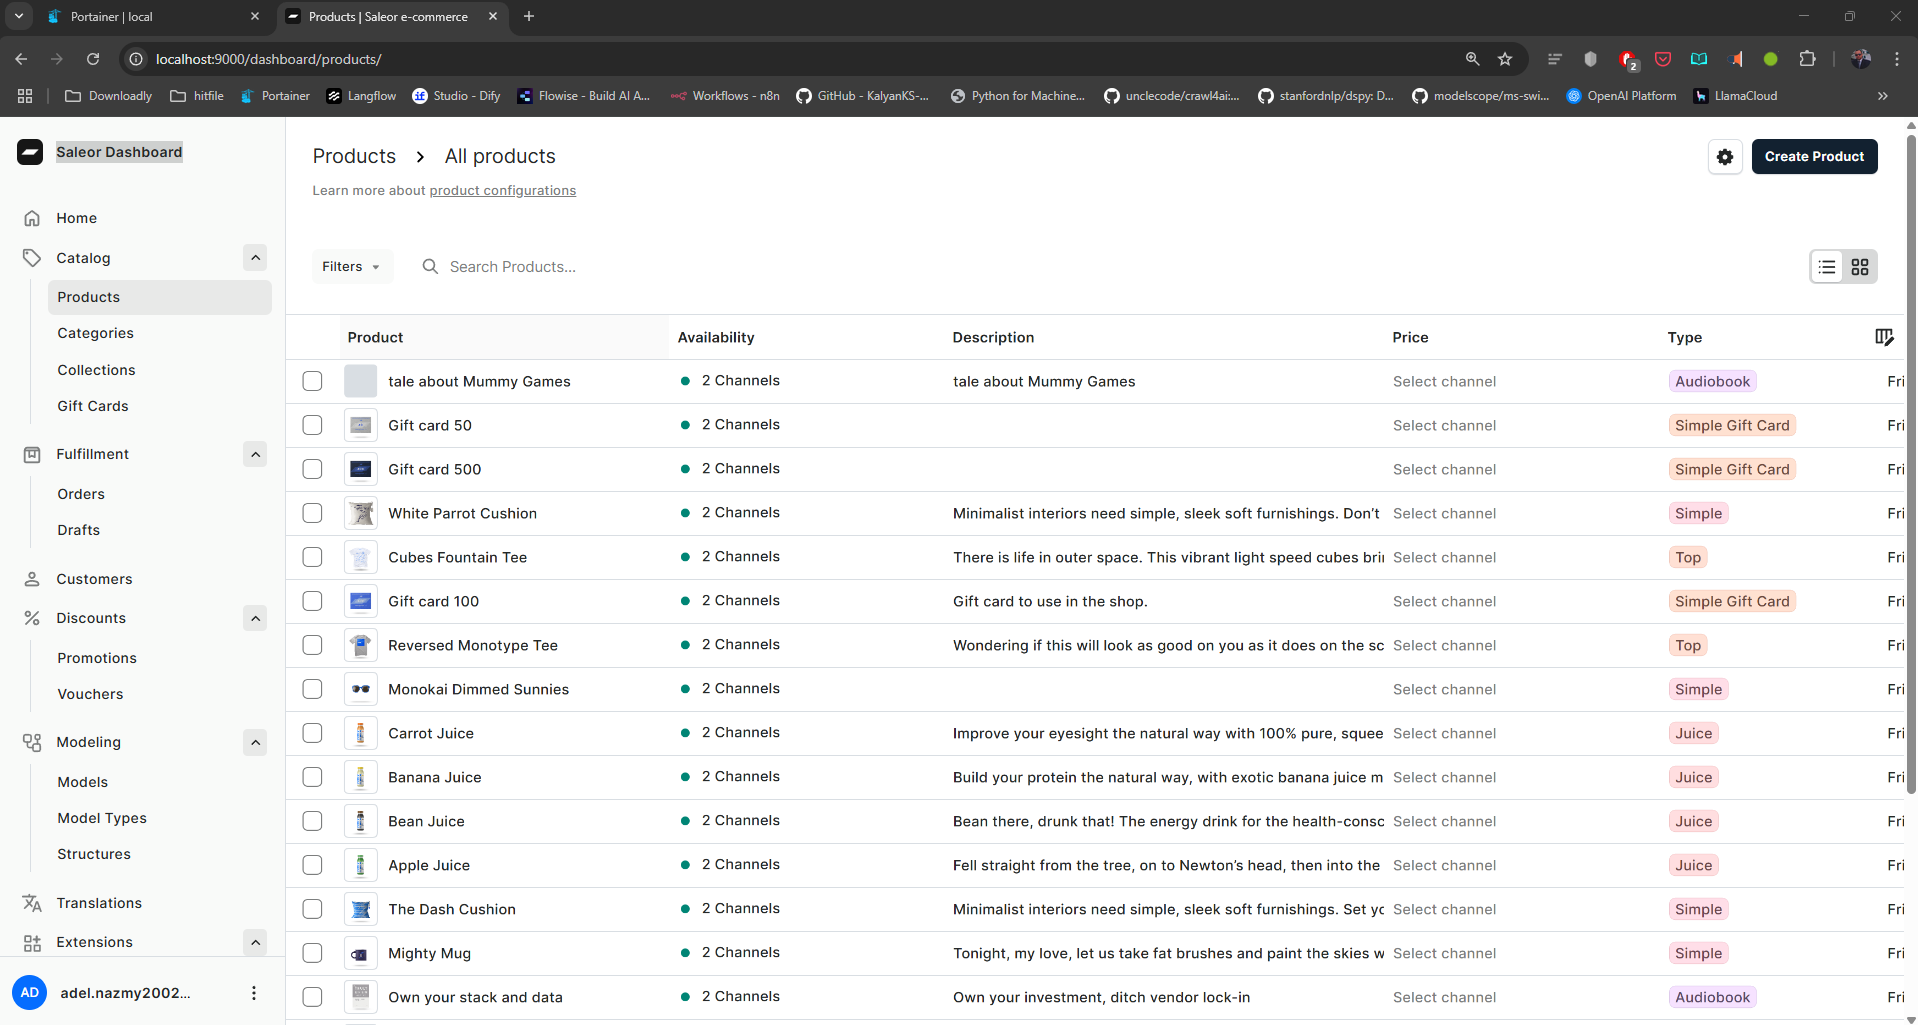

In [3]:
from IPython.display import display, Markdown

### ***BRD Document Contents***

In [4]:
with open('Test-Case-Generation/source/saleor_brd.txt', 'r') as f:
    brd_text = f.read()
    display(Markdown(brd_text))

# **Business Requirements Document (BRD) for Saleor E-commerce Platform**

## **1. Introduction**
### **1.1 Purpose**  
This document outlines the business requirements for implementing **Saleor**, an open-source, GraphQL-first e-commerce platform, to support a modern online store. The goal is to leverage Saleor’s headless architecture for flexibility, scalability, and seamless integration with third-party systems.

### **1.2 Scope**  
The project will cover:  
- Setting up Saleor’s core e-commerce functionalities  
- Customizing the storefront (if applicable)  
- Integrating with payment gateways, shipping providers, and analytics tools  
- Ensuring compliance with security and data privacy standards  

### **1.3 References**  
- **Saleor GitHub Repository**: [https://github.com/saleor/saleor](https://github.com/saleor/saleor)  
- **Saleor Documentation**: [https://docs.saleor.io/](https://docs.saleor.io/)  

---

## **2. Business Objectives**  
| **Objective** | **Description** |
|--------------|----------------|
| **Scalability** | Handle increasing product catalogs & traffic efficiently. |
| **Flexibility** | Support multi-channel sales (web, mobile, marketplaces). |
| **Performance** | Fast, GraphQL-powered API for seamless user experience. |
| **Customization** | Adaptable to business-specific workflows & branding. |
| **Security** | PCI-DSS compliance, secure checkout, and data protection. |

---

## **3. Stakeholders**  
| **Role** | **Responsibilities** |
|----------|----------------------|
| **Business Owner** | Defines high-level goals & budget. |
| **E-commerce Manager** | Oversees product catalog, promotions, and sales. |
| **Developers** | Implements & customizes Saleor. |
| **DevOps Team** | Manages deployment, scaling, and monitoring. |
| **Marketing Team** | Integrates analytics & CRM tools. |

---

## **4. Functional Requirements**  
### **4.1 Core E-Commerce Features**  
| **Feature** | **Requirement** |
|------------|----------------|
| **Product Management** | Support categories, variants, digital/physical products. |
| **Checkout & Payments** | Multiple payment gateways (Stripe, PayPal, etc.). |
| **Order Management** | Order tracking, returns, refunds. |
| **User Accounts** | Guest checkout, customer profiles, wishlists. |
| **Search & Filters** | Fast product search with filters. |

### **4.2 Admin Dashboard**  
- Real-time analytics  
- Inventory management  
- Discount & promotion engine  

### **4.3 Integrations**  
- **Payment Processors**: Stripe, PayPal  
- **Shipping Providers**: FedEx, UPS, DHL  
- **Marketing Tools**: Google Analytics, Mailchimp  

---

## **5. Non-Functional Requirements**  
| **Requirement** | **Description** |
|----------------|----------------|
| **Performance** | <500ms API response time under load. |
| **Security** | GDPR/PCI compliance, encrypted transactions. |
| **Scalability** | Kubernetes/Docker support for horizontal scaling. |
| **Availability** | 99.9% uptime with monitoring (Prometheus/Grafana). |

---

## **6. Technical Considerations**  
### **6.1 Architecture**  
- **Headless Commerce**: Decoupled frontend (React/Next.js) + GraphQL API.  
- **Database**: PostgreSQL (default).  
- **Deployment**: Docker, Kubernetes, or cloud (AWS/GCP).  

### **6.2 Custom Development Needs**  
- Theming the storefront (if not using a pre-built one).  
- Custom plugins/webhooks for business logic.  

---

## **7. Risks & Mitigation**  
| **Risk** | **Mitigation** |
|---------|---------------|
| **Complex GraphQL Adoption** | Training for developers. |
| **Third-Party Integration Failures** | Fallback mechanisms. |
| **Performance Bottlenecks** | Load testing & caching (Redis). |

---

## **8. Success Metrics**  
- **Conversion Rate Improvement** (X% increase in 6 months).  
- **Reduced Checkout Abandonment** (Streamlined UX).  
- **Faster Page Loads** (<2s for product pages).  

---

## **9. Approval**  
| **Name** | **Role** | **Approval Date** |
|---------|---------|------------------|
| [Business Owner] | CEO/Founder | [Date] |
| [Tech Lead] | Lead Developer | [Date] |

---

### **Next Steps**  
1. Conduct a technical feasibility study.  
2. Define MVP scope and timeline.  
3. Begin development & testing phases.  

---
This BRD provides a foundation for implementing **Saleor** as a scalable, high-performance e-commerce solution. Adjustments may be made based on further technical discovery.  


### ***Generate Test Cases from BRD Document***

In [5]:
!ollama list

NAME                        ID              SIZE      MODIFIED     
mxbai-embed-large:latest    468836162de7    669 MB    31 hours ago    
deepseek-r1:latest          6995872bfe4c    5.2 GB    5 days ago      
gemma3:12b                  f4031aab637d    8.1 GB    5 days ago      
gemma3:latest               a2af6cc3eb7f    3.3 GB    5 days ago      
nomic-embed-text:latest     0a109f422b47    274 MB    2 weeks ago     


### Build the prompt

In [6]:
from llama_index.core.prompts import RichPromptTemplate
import time

template_str = """You are an expert test engineer who excels in creating test cases for web products, create test cases from the following Business Requirements Document (BRD):
---------------------
{{ context_str }}
---------------------
"""
qa_template = RichPromptTemplate(template_str)

# you can create text prompt (for completion API)
prompt = qa_template.format(context_str=brd_text)

# or easily convert to message prompts (for chat API)
messages = qa_template.format_messages(context_str=brd_text)

### 1st run set model temperature from 0.1 to retrive deterministic results (less creativity)

In [7]:
from llama_index.llms.ollama import Ollama


llm= Ollama(model="gemma3:12b", temperature=0.1,context_window=16384,request_timeout=500)
gen=llm.stream_chat(messages=messages)

stream_output = display(Markdown(""), display_id=True)  # Empty initial display
full_response = ""

for response in gen:
    full_response += response.delta
    stream_output.update(Markdown(full_response))  # Update the same output
    time.sleep(0.01)  # Small delay for smoother rendering

Okay, here's a comprehensive set of test cases derived from the provided Saleor E-commerce Platform BRD. I've organized them by functional area and included severity levels (Critical, High, Medium, Low) and test data considerations.  I've also included some notes on how Saleor's GraphQL nature impacts testing.  **Please read the notes at the end - they are crucial for effective Saleor testing.**

**Test Case Legend:**

*   **ID:** Unique identifier for the test case.
*   **Test Case Name:** Descriptive name of the test.
*   **Requirement ID:**  Links back to the BRD section.
*   **Test Steps:** Detailed steps to execute the test.
*   **Expected Result:** What should happen if the test passes.
*   **Severity:**  Impact of failure (Critical, High, Medium, Low).
*   **Test Data:**  Example data to use.
*   **Notes:**  Specific considerations for Saleor's architecture.

---

**1. Product Management (4.1 - Product Management)**

| ID | Test Case Name | Requirement ID | Test Steps | Expected Result | Severity | Test Data | Notes |
|---|---|---|---|---|---|---|---|
| PM-001 | Create a new product category | 4.1 | 1. Log in to Admin Dashboard. 2. Navigate to Product Categories. 3. Click "Create Category". 4. Enter category name and description. 5. Save. | Category is created and visible in the product list. | High | Category Name: "Electronics", Description: "Consumer electronics" | Verify GraphQL query returns the new category. |
| PM-002 | Create a physical product with variants | 4.1 | 1. Log in to Admin Dashboard. 2. Navigate to Products. 3. Click "Create Product". 4. Select "Physical" product type. 5. Enter product details, including variants (e.g., size, color). 6. Save. | Product and variants are created and visible. | High | Product Name: "T-Shirt", Variants: Size: S, M, L; Color: Red, Blue | Verify variant pricing and inventory. |
| PM-003 | Create a digital product | 4.1 | 1. Log in to Admin Dashboard. 2. Navigate to Products. 3. Click "Create Product". 4. Select "Digital" product type. 5. Upload a file. 6. Save. | Product is created and file is associated. | Medium | Product Name: "Ebook", File: "sample.pdf" | Verify file download functionality. |
| PM-004 | Edit product details | 4.1 | 1. Log in to Admin Dashboard. 2. Navigate to Products. 3. Select a product. 4. Modify product details. 5. Save. | Product details are updated. | Medium | Product Name: Change from "T-Shirt" to "Premium T-Shirt" |  |

**2. Checkout & Payments (4.1 - Checkout & Payments)**

| ID | Test Case Name | Requirement ID | Test Steps | Expected Result | Severity | Test Data | Notes |
|---|---|---|---|---|---|---|---|
| CP-001 | Successful checkout with Stripe | 4.1 | 1. Add product to cart. 2. Proceed to checkout. 3. Select Stripe as payment method. 4. Enter valid Stripe test card details. 5. Submit order. | Order is placed successfully, and payment is processed. | Critical | Stripe Test Card Details | Verify order confirmation email. |
| CP-002 | Checkout with invalid Stripe card | 4.1 | 1. Add product to cart. 2. Proceed to checkout. 3. Select Stripe as payment method. 4. Enter invalid Stripe test card details. 5. Submit order. | Error message displayed, order not placed. | Critical | Invalid Card Number | Verify error message clarity. |
| CP-003 | Successful checkout with PayPal | 4.1 | 1. Add product to cart. 2. Proceed to checkout. 3. Select PayPal as payment method. 4. Log in to PayPal test account. 5. Confirm payment. | Order is placed successfully, and payment is processed. | Critical | PayPal Test Account | Verify order confirmation email. |

**3. Order Management (4.1 - Order Management)**

| ID | Test Case Name | Requirement ID | Test Steps | Expected Result | Severity | Test Data | Notes |
|---|---|---|---|---|---|---|---|
| OM-001 | Track order status | 4.1 | 1. Log in as customer. 2. Navigate to order history. 3. Select an order. 4. Verify order status. | Order status is displayed correctly. | Medium | Order ID: 12345 |  |
| OM-002 | Initiate a refund | 4.1 | 1. Log in to Admin Dashboard. 2. Navigate to Orders. 3. Select an order. 4. Initiate a refund. 5. Confirm refund. | Refund is processed successfully. | High | Order ID: 12345 | Verify refund confirmation email. |

**4. User Accounts (4.1 - User Accounts)**

| ID | Test Case Name | Requirement ID | Test Steps | Expected Result | Severity | Test Data | Notes |
|---|---|---|---|---|---|---|---|
| UA-001 | Guest checkout | 4.1 | 1. Add product to cart. 2. Proceed to checkout. 3. Checkout as guest. 4. Enter guest details. 5. Submit order. | Order is placed successfully without account creation. | Medium |  | Verify order confirmation email. |
| UA-002 | Create a customer account | 4.1 | 1. Add product to cart. 2. Proceed to checkout. 3. Create a new account. 4. Enter valid details. 5. Submit order. | Account is created successfully, and order is placed. | Medium |  | Verify account confirmation email. |

**5. Search & Filters (4.1 - Search & Filters)**

| ID | Test Case Name | Requirement ID | Test Steps | Expected Result | Severity | Test Data | Notes |
|---|---|---|---|---|---|---|---|
| SF-001 | Search for a product by name | 4.1 | 1. Enter product name in search bar. 2. Submit search. | Relevant products are displayed. | High | Product Name: "T-Shirt" |  |
| SF-002 | Filter products by category | 4.1 | 1. Navigate to product listing page. 2. Select a category filter. | Products belonging to the selected category are displayed. | Medium | Category: "Electronics" |  |

**6. Admin Dashboard (4.2 - Admin Dashboard)**

| ID | Test Case Name | Requirement ID | Test Steps | Expected Result | Severity | Test Data | Notes |
|---|---|---|---|---|---|---|---|
| AD-001 | Verify real-time analytics | 4.2 | 1. Log in to Admin Dashboard. 2. Navigate to Analytics section. 3. Observe data updates. | Data is displayed in real-time. | Medium |  |  |
| AD-002 | Create a discount code | 4.2 | 1. Log in to Admin Dashboard. 2. Navigate to Promotions. 3. Create a discount code. 4. Save. | Discount code is created and visible. | Medium | Code: "SALE10", Discount: 10% |  |

**7. Integrations (4.3 - Integrations)**

| ID | Test Case Name | Requirement ID | Test Steps | Expected Result | Severity | Test Data | Notes |
|---|---|---|---|---|---|---|---|
| IN-001 | Verify Google Analytics tracking | 4.3 | 1. Navigate to a product page. 2. Observe Google Analytics tracking events. | Events are tracked correctly in Google Analytics. | Medium |  |  |
| IN-002 | Verify Mailchimp integration | 4.3 | 1. Add a customer to Mailchimp list. 2. Verify customer is added to the correct Mailchimp segment. | Customer is added to the correct segment. | Medium |  |

---

**Important Notes for Saleor Testing:**

*   **GraphQL Testing:**  Saleor's GraphQL API requires a different testing approach.  You'll need to:
    *   **Test Queries:**  Validate that queries return the expected data and structure. Use tools like GraphiQL or Insomnia to craft and execute queries.
    *   **Test Mutations:**  Verify that mutations (e.g., creating a product, placing an order) correctly update the data.
    *   **Schema Validation:**  Ensure that queries and mutations conform to the GraphQL schema.
*   **Headless Architecture:**  Since Saleor is headless, you're primarily testing the API.  Frontend testing (React/Next.js) is a separate effort.
*   **Performance Testing:**  Crucially important.  Use load testing tools to simulate traffic and verify API response times (<500ms).  Focus on key workflows like product browsing and checkout.
*   **Security Testing:**  PCI-DSS compliance is paramount.  Conduct thorough security testing, including penetration testing and vulnerability scanning.
*   **Data Privacy:**  Ensure GDPR compliance by testing data handling and user consent mechanisms.
*   **Custom Plugins/Webhooks:**  If custom plugins or webhooks are implemented, test their functionality thoroughly.
*   **Test Data Management:**  Use a consistent and well-managed test data set to ensure repeatable test results.



This comprehensive set of test cases provides a strong foundation for testing your Saleor E-commerce Platform implementation. Remember to adapt and expand these cases based on your specific requirements and customizations. Good luck!

### 2nd run modified model temperature from 0.1 to 0.7 to increase model creativity

In [8]:
llm= Ollama(model="gemma3:12b", temperature=0.7,context_window=16384,request_timeout=500)

gen=llm.stream_chat(messages=messages)

stream_output = display(Markdown(""), display_id=True)  # Empty initial display
full_response = ""

for response in gen:
    full_response += response.delta
    stream_output.update(Markdown(full_response))  # Update the same output
    time.sleep(0.01)  # Small delay for smoother rendering

Okay, here's a comprehensive set of test cases derived from the provided Saleor BRD.  I've organized them by functional area and prioritized them based on criticality (High, Medium, Low).  I'll also include a 'Test Type' column to indicate whether it's a functional, performance, security, or integration test.  Finally, I'll add some notes on environment considerations where appropriate.

**Note:**  These test cases assume a basic Saleor installation and are meant to be expanded upon during the detailed test planning phase.  They also assume some familiarity with GraphQL and Saleor's architecture.

**Test Case Table**

| **Test Case ID** | **Feature** | **Test Case Description** | **Expected Result** | **Priority** | **Test Type** | **Notes/Environment** |
|---|---|---|---|---|---|---|
| **Core E-Commerce - Product Management** |
| TC_PM_001 | Product Category Creation | Create a new product category with name, description, and image. | Category is created and visible in the admin panel. | High | Functional |  Admin Panel Access Required |
| TC_PM_002 | Product Variant Creation | Create a product with multiple variants (e.g., size, color). | Variants are created and correctly associated with the product. | High | Functional | Admin Panel Access Required |
| TC_PM_003 | Digital Product Upload | Upload a digital product (e.g., ebook, software). |  File is uploaded and accessible to customers after purchase. | Medium | Functional |  Ensure proper file storage permissions |
| TC_PM_004 | Physical Product Details | Verify all fields are populating correctly for a physical product (price, weight, dimensions) | All fields are correctly populated and accessible. | Medium | Functional | Admin Panel Access Required |
| **Core E-Commerce - Checkout & Payments** |
| TC_CO_001 | Stripe Payment Success | Initiate a purchase and successfully complete payment via Stripe. | Payment is processed successfully, order is created, and customer receives confirmation. | High | Functional, Integration |  Stripe Test Credentials Required |
| TC_CO_002 | PayPal Payment Success | Initiate a purchase and successfully complete payment via PayPal. | Payment is processed successfully, order is created, and customer receives confirmation. | High | Functional, Integration | PayPal Sandbox Account Required |
| TC_CO_003 | Guest Checkout | Complete checkout as a guest user. | Order is created and confirmation is sent to provided email address. | Medium | Functional |  Ensure guest checkout functionality is enabled |
| TC_CO_004 | Payment Gateway Failure | Simulate a payment gateway failure (e.g., declined card). |  Error message is displayed to the customer, and order is not created. | High | Functional, Integration | Requires ability to simulate payment failures |
| **Core E-Commerce - Order Management** |
| TC_OM_001 | Order Tracking | Verify order tracking functionality for customers. | Customers can view order status and tracking information. | Medium | Functional |  Requires integration with shipping provider |
| TC_OM_002 | Refund Process | Initiate a refund for an order. | Refund is processed correctly, and order status is updated. | Medium | Functional |  Requires appropriate permissions |
| **Core E-Commerce - User Accounts** |
| TC_UA_001 | Customer Profile Creation | Create a new customer profile. | Customer profile is created and data is stored correctly. | Medium | Functional | Admin Panel Access Required |
| TC_UA_002 | Wishlist Functionality | Add products to a wishlist. | Products are added to and displayed correctly in the wishlist. | Medium | Functional | Requires user login |
| **Core E-Commerce - Search & Filters** |
| TC_SF_001 | Keyword Search | Perform a keyword search for products. | Relevant products are displayed in the search results. | High | Functional |  Ensure search indexing is configured |
| TC_SF_002 | Filter by Category | Filter products by category. | Only products within the selected category are displayed. | High | Functional | Admin Panel Access Required |
| **Admin Dashboard** |
| TC_AD_001 | Real-Time Analytics Display | Verify that real-time analytics are displayed correctly. | Data is displayed accurately and updated in real-time. | Medium | Functional |  Requires data generation |
| TC_AD_002 | Inventory Management Update | Update product inventory levels. | Inventory levels are updated correctly and reflected in the storefront. | Medium | Functional | Admin Panel Access Required |
| TC_AD_003 | Discount Engine Creation | Create a discount code with specific rules. | Discount code is created and applied correctly during checkout. | Medium | Functional | Admin Panel Access Required |
| **Integrations** |
| TC_INT_001 | FedEx Shipping Integration | Verify shipping calculation with FedEx. | Accurate shipping rates are calculated and displayed. | Medium | Integration | FedEx API Credentials Required |
| TC_INT_002 | UPS Shipping Integration | Verify shipping calculation with UPS. | Accurate shipping rates are calculated and displayed. | Medium | Integration | UPS API Credentials Required |
| TC_INT_003 | Mailchimp Integration | Verify new customer subscription to Mailchimp. | New customer is automatically added to the Mailchimp list. | Medium | Integration | Mailchimp API Credentials Required |
| TC_INT_004 | Google Analytics Tracking | Verify that Google Analytics tracking code is firing correctly on product pages. | GA events are recorded for product views and add-to-cart actions. | Medium | Integration |  Google Analytics Account Required |
| **Non-Functional** |
| TC_NF_001 | API Response Time | Measure the average API response time under load. | Response time is consistently below 500ms. | High | Performance | Load Testing Tool Required |
| TC_NF_002 | GDPR Compliance | Verify data handling and user consent mechanisms comply with GDPR. | User data is handled securely and in compliance with GDPR requirements. | High | Security | Legal Review Required |
| TC_NF_003 | PCI Compliance | Verify that the checkout process is PCI compliant. | Credit card data is encrypted and handled securely. | High | Security | Security Audit Required |
| **Technical Considerations** |
| TC_TC_001 | Headless Architecture Validation | Verify that the GraphQL API is functioning correctly and is decoupled from the storefront. | Data can be retrieved and displayed correctly via the GraphQL API. | Medium | Functional | GraphQL Client Required |

**Important Considerations:**

*   **Environment:**  Testing should be performed in a dedicated testing environment that mirrors the production environment as closely as possible.
*   **Data:**  Use realistic test data to ensure accurate results.
*   **Documentation:**  Document all test results and any defects found.
*   **Automation:**  Consider automating repetitive test cases to improve efficiency.
*   **Security Testing:** Engage security experts for penetration testing and vulnerability assessments.
*   **Load Testing:** Perform load testing to ensure scalability and performance under heavy load.



This comprehensive list should serve as a solid starting point for your Saleor testing efforts. Remember to tailor these test cases to your specific implementation and business needs. Good luck!

# Using OpenAI GPT-4.1-mini instead 

In [4]:
from llama_index.llms.openai import OpenAI

llm= OpenAI(model="gpt-4.1-mini", temperature=0.1, max_tokens=4096, request_timeout=500)

gen=llm.stream_chat(messages=messages)

stream_output = display(Markdown(""), display_id=True)  # Empty initial display
full_response = ""

for response in gen:
    full_response += response.delta
    stream_output.update(Markdown(full_response))  # Update the same output
    time.sleep(0.01)  # Small delay for smoother rendering

Certainly! Below are detailed test cases derived from the provided BRD for the Saleor E-commerce Platform. These test cases cover functional, integration, performance, security, and non-functional aspects based on the documented requirements.

---

# Test Cases for Saleor E-commerce Platform

---

## 1. Product Management

| Test Case ID | TC-PRD-001 |
|--------------|------------|
| **Title** | Verify product creation with categories and variants |
| **Description** | Ensure admin can create products with categories, multiple variants, and specify if product is digital or physical |
| **Preconditions** | Admin user logged into Admin Dashboard |
| **Test Steps** | 1. Navigate to Product Management section<br>2. Create a new product<br>3. Assign category<br>4. Add multiple variants (e.g., size, color)<br>5. Specify product type (digital/physical)<br>6. Save product |
| **Expected Result** | Product is created successfully with all variants and category assigned; product type is correctly saved and displayed |

---

| Test Case ID | TC-PRD-002 |
|--------------|------------|
| **Title** | Verify product search and filtering functionality |
| **Description** | Ensure users can search products and apply filters (category, price, availability) |
| **Preconditions** | Products exist in catalog |
| **Test Steps** | 1. Go to storefront search bar<br>2. Enter product keyword<br>3. Apply filters (e.g., category, price range)<br>4. Submit search |
| **Expected Result** | Search results display relevant products matching keyword and filters; response time < 500ms |

---

## 2. Checkout & Payments

| Test Case ID | TC-CHK-001 |
|--------------|------------|
| **Title** | Verify checkout process with multiple payment gateways |
| **Description** | Ensure checkout supports Stripe and PayPal payment options |
| **Preconditions** | Product added to cart; user on checkout page |
| **Test Steps** | 1. Proceed to checkout<br>2. Select Stripe as payment method<br>3. Complete payment with valid card details<br>4. Repeat steps with PayPal payment method |
| **Expected Result** | Payment is processed successfully for both gateways; order confirmation is displayed |

---

| Test Case ID | TC-CHK-002 |
|--------------|------------|
| **Title** | Verify guest checkout functionality |
| **Description** | Ensure users can checkout without creating an account |
| **Preconditions** | Product added to cart |
| **Test Steps** | 1. Proceed to checkout as guest<br>2. Enter required shipping and payment details<br>3. Complete order |
| **Expected Result** | Order is placed successfully; guest user receives order confirmation |

---

## 3. Order Management

| Test Case ID | TC-ORD-001 |
|--------------|------------|
| **Title** | Verify order tracking functionality |
| **Description** | Ensure customers can track order status after purchase |
| **Preconditions** | Order placed and shipped |
| **Test Steps** | 1. Login as customer<br>2. Navigate to order history<br>3. Select an order<br>4. View tracking information |
| **Expected Result** | Order status and tracking details are displayed accurately |

---

| Test Case ID | TC-ORD-002 |
|--------------|------------|
| **Title** | Verify order return and refund process |
| **Description** | Ensure customers can request returns and refunds via the platform |
| **Preconditions** | Delivered order exists |
| **Test Steps** | 1. Login as customer<br>2. Navigate to order history<br>3. Select order and initiate return request<br>4. Submit refund request |
| **Expected Result** | Return and refund requests are submitted and processed; status updates visible to customer and admin |

---

## 4. User Accounts

| Test Case ID | TC-ACC-001 |
|--------------|------------|
| **Title** | Verify customer profile creation and update |
| **Description** | Ensure users can register, login, and update profile information |
| **Preconditions** | None |
| **Test Steps** | 1. Register new user<br>2. Login with credentials<br>3. Navigate to profile settings<br>4. Update profile details (address, phone, etc.)<br>5. Save changes |
| **Expected Result** | User registration, login, and profile updates succeed; changes persist |

---

| Test Case ID | TC-ACC-002 |
|--------------|------------|
| **Title** | Verify wishlist functionality for logged-in users |
| **Description** | Ensure users can add/remove products to/from wishlist |
| **Preconditions** | User logged in; products available |
| **Test Steps** | 1. Browse product catalog<br>2. Add product to wishlist<br>3. Navigate to wishlist page<br>4. Remove product from wishlist |
| **Expected Result** | Products are added and removed from wishlist correctly; wishlist persists across sessions |

---

## 5. Admin Dashboard

| Test Case ID | TC-ADM-001 |
|--------------|------------|
| **Title** | Verify real-time analytics display |
| **Description** | Ensure admin dashboard shows real-time sales and traffic analytics |
| **Preconditions** | Admin logged in; sales data available |
| **Test Steps** | 1. Login to Admin Dashboard<br>2. Navigate to Analytics section |
| **Expected Result** | Real-time analytics data is displayed and updated correctly |

---

| Test Case ID | TC-ADM-002 |
|--------------|------------|
| **Title** | Verify inventory management updates stock levels |
| **Description** | Ensure admin can update inventory quantities and changes reflect in storefront |
| **Preconditions** | Admin logged in; product exists |
| **Test Steps** | 1. Navigate to Inventory Management<br>2. Update stock quantity for a product<br>3. Save changes<br>4. Verify updated stock on storefront |
| **Expected Result** | Inventory updates successfully; storefront reflects correct stock availability |

---

| Test Case ID | TC-ADM-003 |
|--------------|------------|
| **Title** | Verify discount and promotion engine functionality |
| **Description** | Ensure admin can create discounts and promotions that apply correctly at checkout |
| **Preconditions** | Admin logged in; products available |
| **Test Steps** | 1. Create a discount/promotion (e.g., 10% off)<br>2. Apply promotion to specific products or categories<br>3. Add eligible products to cart<br>4. Proceed to checkout |
| **Expected Result** | Discounts are applied correctly; final price reflects promotion |

---

## 6. Integrations

| Test Case ID | TC-INT-001 |
|--------------|------------|
| **Title** | Verify integration with FedEx, UPS, DHL shipping providers |
| **Description** | Ensure shipping options and rates from FedEx, UPS, DHL are available during checkout |
| **Preconditions** | Shipping provider accounts configured |
| **Test Steps** | 1. Add product to cart<br>2. Proceed to checkout<br>3. Select shipping method<br>4. Verify shipping rates and options from FedEx, UPS, DHL |
| **Expected Result** | Shipping options and rates are displayed correctly; selection is saved with order |

---

| Test Case ID | TC-INT-002 |
|--------------|------------|
| **Title** | Verify integration with Google Analytics and Mailchimp |
| **Description** | Ensure user interactions and sales data are tracked and sent to Google Analytics and Mailchimp |
| **Preconditions** | Integrations configured |
| **Test Steps** | 1. Perform user actions (browse, add to cart, purchase)<br>2. Verify events in Google Analytics dashboard<br>3. Verify email campaigns and subscriber data in Mailchimp |
| **Expected Result** | Relevant events and data are correctly tracked and synchronized |

---

## 7. Performance & Scalability

| Test Case ID | TC-PERF-001 |
|--------------|------------|
| **Title** | Verify API response time under load |
| **Description** | Ensure GraphQL API responds within 500ms under expected load |
| **Preconditions** | Load testing environment set up |
| **Test Steps** | 1. Simulate concurrent users accessing API endpoints<br>2. Measure response times |
| **Expected Result** | API response times remain below 500ms under load |

---

| Test Case ID | TC-PERF-002 |
|--------------|------------|
| **Title** | Verify horizontal scaling with Kubernetes/Docker |
| **Description** | Ensure system scales horizontally without downtime |
| **Preconditions** | Kubernetes/Docker deployment configured |
| **Test Steps** | 1. Increase load gradually<br>2. Monitor system scaling behavior<br>3. Verify availability and performance |
| **Expected Result** | System scales horizontally; uptime remains 99.9%; no performance degradation |

---

## 8. Security & Compliance

| Test Case ID | TC-SEC-001 |
|--------------|------------|
| **Title** | Verify PCI-DSS compliance during checkout |
| **Description** | Ensure payment data is handled securely and encrypted |
| **Preconditions** | Payment gateways configured |
| **Test Steps** | 1. Perform checkout with payment<br>2. Monitor data transmission<br>3. Verify encryption and compliance controls |
| **Expected Result** | Payment data is encrypted; no sensitive data exposed; PCI-DSS compliance met |

---

| Test Case ID | TC-SEC-002 |
|--------------|------------|
| **Title** | Verify GDPR compliance for user data |
| **Description** | Ensure users can request data export and deletion |
| **Preconditions** | User account exists |
| **Test Steps** | 1. Login as user<br>2. Request personal data export<br>3. Request account deletion<br>4. Verify data is exported and deleted accordingly |
| **Expected Result** | Data export and deletion requests are processed per GDPR requirements |

---

## 9. Theming & Customization

| Test Case ID | TC-CUST-001 |
|--------------|------------|
| **Title** | Verify storefront theming and branding customization |
| **Description** | Ensure custom themes and branding are applied correctly on storefront |
| **Preconditions** | Custom theme developed and deployed |
| **Test Steps** | 1. Apply custom theme<br>2. Navigate storefront pages<br>3. Verify branding elements (logo, colors, fonts) |
| **Expected Result** | Custom theme is applied consistently across all pages |

---

## 10. Error Handling & Fallbacks

| Test Case ID | TC-ERR-001 |
|--------------|------------|
| **Title** | Verify fallback mechanism on third-party integration failure |
| **Description** | Ensure system handles payment or shipping provider failures gracefully |
| **Preconditions** | Simulate third-party service downtime |
| **Test Steps** | 1. Attempt checkout or shipping rate retrieval during downtime<br>2. Observe system behavior |
| **Expected Result** | User is informed of issue; alternative options or retry mechanisms provided; no system crash |

---

# Summary

These test cases cover the critical functional and non-functional requirements outlined in the BRD. Additional exploratory and regression tests should be created during development to cover edge cases and new features.

If you want, I can also provide test case templates or automation suggestions for these scenarios.

### 2nd run modified model temperature from 0.1 to 0.9 to increase model creativity

In [5]:
llm= OpenAI(model="gpt-4.1-mini", temperature=0.9, max_tokens=4096, request_timeout=500)

gen=llm.stream_chat(messages=messages)

stream_output = display(Markdown(""), display_id=True)  # Empty initial display
full_response = ""

for response in gen:
    full_response += response.delta
    stream_output.update(Markdown(full_response))  # Update the same output
    time.sleep(0.01)  # Small delay for smoother rendering

Certainly! Below are detailed test cases derived from the BRD sections, covering functional, integration, non-functional, and security aspects relevant to the Saleor e-commerce platform implementation.

---

# Test Cases for Saleor E-commerce Platform

---

## **1. Product Management**

| Test Case ID | TC-FE-001 |
|--------------|-----------|
| **Title** | Verify adding a new product with category and variants |
| **Description** | Add a product with multiple variants under a specific category and confirm it is saved correctly |
| **Preconditions** | Admin logged into the dashboard |
| **Test Steps** | 1. Navigate to Product Management<br>2. Click "Add Product"<br>3. Enter product details (name, description, price)<br>4. Assign category<br>5. Add multiple variants (size, color)<br>6. Save product |
| **Expected Results** | Product is created with all variants and category assigned, visible in catalog |

---

| Test Case ID | TC-FE-002 |
|--------------|-----------|
| **Title** | Verify support for digital and physical products |
| **Description** | Add both digital and physical products and verify appropriate options (e.g., shipping for physical only) |
| **Preconditions** | Admin logged in |
| **Test Steps** | 1. Add a physical product and set shipping options<br>2. Add a digital product and upload downloadable file<br>3. Save both products |
| **Expected Results** | Physical product requires shipping info; digital product offers download link; both appear correctly in store |

---

## **2. Checkout & Payments**

| Test Case ID | TC-FE-003 |
|--------------|-----------|
| **Title** | Verify checkout process with Stripe payment gateway |
| **Description** | Complete checkout using Stripe and confirm order is placed successfully |
| **Preconditions** | Product in cart; Stripe configured |
| **Test Steps** | 1. Add product to cart<br>2. Proceed to checkout<br>3. Enter shipping details<br>4. Select Stripe as payment method<br>5. Enter valid payment details<br>6. Confirm order |
| **Expected Results** | Payment processed via Stripe; order confirmation displayed; order recorded in system |

---

| Test Case ID | TC-FE-004 |
|--------------|-----------|
| **Title** | Verify checkout process with PayPal payment gateway |
| **Description** | Complete checkout using PayPal and confirm order placement |
| **Preconditions** | Product in cart; PayPal configured |
| **Test Steps** | Similar to TC-FE-003 but select PayPal at payment step |
| **Expected Results** | Payment processed via PayPal; order confirmation displayed |

---

| Test Case ID | TC-FE-005 |
|--------------|-----------|
| **Title** | Verify guest checkout functionality |
| **Description** | Verify that users can checkout without creating an account |
| **Preconditions** | Product in cart |
| **Test Steps** | 1. Add product to cart<br>2. Proceed to checkout as guest (without login)<br>3. Complete checkout steps |
| **Expected Results** | Order placed successfully; guest order confirmation received |

---

## **3. Order Management**

| Test Case ID | TC-FE-006 |
|--------------|-----------|
| **Title** | Verify order tracking functionality for customers |
| **Description** | Customer is able to view order status and history |
| **Preconditions** | User with at least one order logged in |
| **Test Steps** | 1. Login as customer<br>2. Navigate to "My Orders"<br>3. Select an order<br>4. View order status, tracking info |
| **Expected Results** | Order details and current status visible; tracking links functioning |

---

| Test Case ID | TC-FE-007 |
|--------------|-----------|
| **Title** | Verify return and refund process via order management |
| **Description** | Customer initiates a return and refund; admin processes it successfully |
| **Preconditions** | Delivered order eligible for return |
| **Test Steps** | 1. Customer requests return/refund via UI<br>2. Admin views return request<br>3. Approve return and process refund<br>4. Verify refund transaction status |
| **Expected Results** | Return request processed; refund issued; status updated for customer |

---

## **4. User Accounts**

| Test Case ID | TC-FE-008 |
|--------------|-----------|
| **Title** | Verify user registration and login functionality |
| **Description** | New users can register and log in successfully |
| **Preconditions** | None |
| **Test Steps** | 1. Register a new user<br>2. Verify email confirmation (if applicable)<br>3. Log in with new credentials |
| **Expected Results** | Registration successful; login allowed |

---

| Test Case ID | TC-FE-009 |
|--------------|-----------|
| **Title** | Verify wishlist creation and management |
| **Description** | Customer can add products to wishlist and manage them |
| **Preconditions** | User logged in |
| **Test Steps** | 1. Browse products<br>2. Add product(s) to wishlist<br>3. View wishlist<br>4. Remove product from wishlist |
| **Expected Results** | Wishlist updated accordingly; changes persist between sessions |

---

## **5. Search & Filters**

| Test Case ID | TC-FE-010 |
|--------------|-----------|
| **Title** | Verify product search with filters |
| **Description** | Search returns relevant products with applied filters (category, price, variant) |
| **Preconditions** | Several products added with distinct categories/variants |
| **Test Steps** | 1. Search for a keyword<br>2. Apply category and price range filters<br>3. Verify filtered results |
| **Expected Results** | Search results relevant to keyword and filters; fast response time |

---

## **6. Admin Dashboard**

| Test Case ID | TC-FE-011 |
|--------------|-----------|
| **Title** | Verify real-time analytics display in admin dashboard |
| **Description** | Admin dashboard displays updated sales and traffic data in real-time |
| **Preconditions** | Admin access; sales data available |
| **Test Steps** | 1. Login to admin dashboard<br>2. Navigate to analytics section<br>3. Verify data updates automatically |
| **Expected Results** | Real-time analytics visible and accurate |

---

| Test Case ID | TC-FE-012 |
|--------------|-----------|
| **Title** | Verify inventory management in admin dashboard |
| **Description** | Admin can view, update, and alert on inventory levels |
| **Preconditions** | Products with inventory counts present |
| **Test Steps** | 1. Navigate to inventory management<br>2. Update stock quantity<br>3. Configure low stock alert thresholds |
| **Expected Results** | Inventory changes saved; alerts triggered when thresholds reached |

---

| Test Case ID | TC-FE-013 |
|--------------|-----------|
| **Title** | Verify discount & promotion engine functionality |
| **Description** | Admin can create, edit, and apply discounts/promotions |
| **Preconditions** | Admin access |
| **Test Steps** | 1. Create new discount (percentage/fixed amount)<br>2. Set applicable products and duration<br>3. Save and apply discount<br>4. Verify discount reflected during checkout |
| **Expected Results** | Discounts appear and apply correctly at checkout |

---

## **7. Integrations**

| Test Case ID | TC-IN-001 |
|------------|-----------|
| **Title** | Verify integration with Stripe payment processor |
| **Description** | Transactions through Stripe are processed and recorded correctly |
| **Preconditions** | Stripe configured |
| **Test Steps** | Similar to TC-FE-003 |
| **Expected Results** | Payments are successful; transaction recorded |

---

| Test Case ID | TC-IN-002 |
|------------|-----------|
| **Title** | Verify integration with PayPal payment processor |
| **Description** | Transactions through PayPal processed correctly |
| **Preconditions** | PayPal configured |
| **Test Steps** | Similar to TC-FE-004 |
| **Expected Results** | Payments successful; order recorded |

---

| Test Case ID | TC-IN-003 |
|------------|-----------|
| **Title** | Verify shipping provider integration (FedEx, UPS, DHL) |
| **Description** | Shipping labels generated; tracking info received from provider |
| **Preconditions** | Shipping providers configured |
| **Test Steps** | 1. Place an order requiring shipping<br>2. Generate shipping label<br>3. Verify tracking number and status updates |
| **Expected Results** | Shipping labels generated; tracking info accessible to customer |

---

| Test Case ID | TC-IN-004 |
|------------|-----------|
| **Title** | Verify integration with Google Analytics and Mailchimp |
| **Description** | Analytics events and marketing lists updated correctly |
| **Preconditions** | Google Analytics and Mailchimp configured |
| **Test Steps** | 1. Trigger user events (page views, purchases)<br>2. Verify event tracking in GA dashboard<br>3. Verify Mailchimp subscriber updates after signups |
| **Expected Results** | Events logged correctly; Mailchimp lists updated |

---

## **8. Performance**

| Test Case ID | TC-NF-001 |
|------------|----------|
| **Title** | Verify API response time under normal and peak load |
| **Description** | API responses should be under 500ms per requirement |
| **Preconditions** | Load testing environment ready |
| **Test Steps** | 1. Perform API requests simulating normal load<br>2. Perform API requests simulating peak load (expected traffic)<br>3. Measure response times |
| **Expected Results** | API response time consistently < 500ms |

---

| Test Case ID | TC-NF-002 |
|------------|----------|
| **Title** | Verify page load time for product pages |
| **Description** | Product pages load in under 2 seconds |
| **Preconditions** | Frontend environment ready |
| **Test Steps** | Load product page multiple times<br>Measure page load time |
| **Expected Results** | Page loads < 2 seconds consistently |

---

## **9. Security**

| Test Case ID | TC-SC-001 |
|------------|----------|
| **Title** | Verify PCI-DSS compliance during checkout |
| **Description** | Ensure payment data is handled securely per PCI-DSS |
| **Preconditions** | Payment gateways configured |
| **Test Steps** | 1. Execute checkout with card payment<br>2. Monitor data transmission<br>3. Verify encryption (SSL/TLS) and no sensitive data logged |
| **Expected Results** | Payment data encrypted; no sensitive info exposed |

---

| Test Case ID | TC-SC-002 |
|------------|----------|
| **Title** | Verify GDPR compliance for personal data management |
| **Description** | Verify users can access, edit, and delete their personal data |
| **Preconditions** | User account exists |
| **Test Steps** | 1. Login as user<br>2. Access personal data section<br>3. Request data export<br>4. Request account deletion |
| **Expected Results** | Data export provided; account deleted with confirmation |

---

## **10. Scalability & Availability**

| Test Case ID | TC-NF-003 |
|------------|----------|
| **Title** | Verify horizontal scaling via Kubernetes/Docker |
| **Description** | Verify application can scale horizontally without downtime |
| **Preconditions** | Deployment environment ready |
| **Test Steps** | 1. Simulate increase in traffic<br>2. Scale pods/containers up/down<br>3. Monitor application availability and performance |
| **Expected Results** | No downtime during scaling; performance maintained |

---

| Test Case ID | TC-NF-004 |
|------------|----------|
| **Title** | Verify uptime monitoring and alerting (99.9% SLA) |
| **Description** | Verify monitoring tools (Prometheus/Grafana) track uptime and send alerts |
| **Preconditions** | Monitoring tools configured |
| **Test Steps** | 1. Monitor uptime for defined period<br>2. Simulate downtime<br>3. Verify alerts generated and logged |
| **Expected Results** | Accurate uptime metrics; alerts sent as configured |

---

## **11. Custom Development**

| Test Case ID | TC-CUST-001 |
|------------|-------------|
| **Title** | Verify storefront theming customization |
| **Description** | Custom themes applied correctly without breaking functionality |
| **Preconditions** | Storefront customization enabled |
| **Test Steps** | 1. Apply custom theme<br>2. Load various pages<br>3. Verify UI consistency and no errors |
| **Expected Results** | Theme applied; pages render correctly |

---

| Test Case ID | TC-CUST-002 |
|------------|-------------|
| **Title** | Verify custom plugins and webhooks functionality |
| **Description** | Custom plugins/webhooks trigger as expected during lifecycle events |
| **Preconditions** | Custom plugins/webhooks deployed |
| **Test Steps** | 1. Trigger relevant events (e.g., order created)<br>2. Verify plugins/webhooks execute and perform intended actions |
| **Expected Results** | Plugins/webhooks triggered and completed without error |

---

# Notes

- For all test cases involving integration with third-party providers, include negative tests for failure handling and fallback mechanisms.
- Include exploratory testing around GraphQL queries and mutations to validate coverage and error handling.
- Security tests should include penetration testing and vulnerability scans.
- Performance tests to be automated and executed as part of CI/CD pipeline.
- Accessibility and cross-browser compatibility testing should be planned as additional test scopes.

---

If you want, I can also prepare sample test data or detailed test scripts for any of these cases.

---

# 2. **Visual Test Case Generation:** Automate the generation of test cases for visual testing

### Using GPT-4.1-mini vision capability 

### Using selenium to get screenshots

In [13]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

def take_screenshot(url, output_path="screenshot.png", window_size=(1920, 1080)):
    """
    Takes a screenshot of the given website URL and saves it to output_path.

    Args:
        url (str): The website URL to capture.
        output_path (str): Path to save the screenshot image.
        window_size (tuple): Browser window size (width, height).
    """
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument(f"--window-size={window_size[0]},{window_size[1]}")
    driver = webdriver.Chrome(options=chrome_options)
    try:
        driver.get(url)
        driver.save_screenshot(output_path)
    finally:
        driver.quit()

In [14]:
url="http://localhost:9000/dashboard/products/?asc=false&sort=date"

take_screenshot(url, output_path="Test-Case-Generation/screenshot.png", window_size=(1920, 1080))

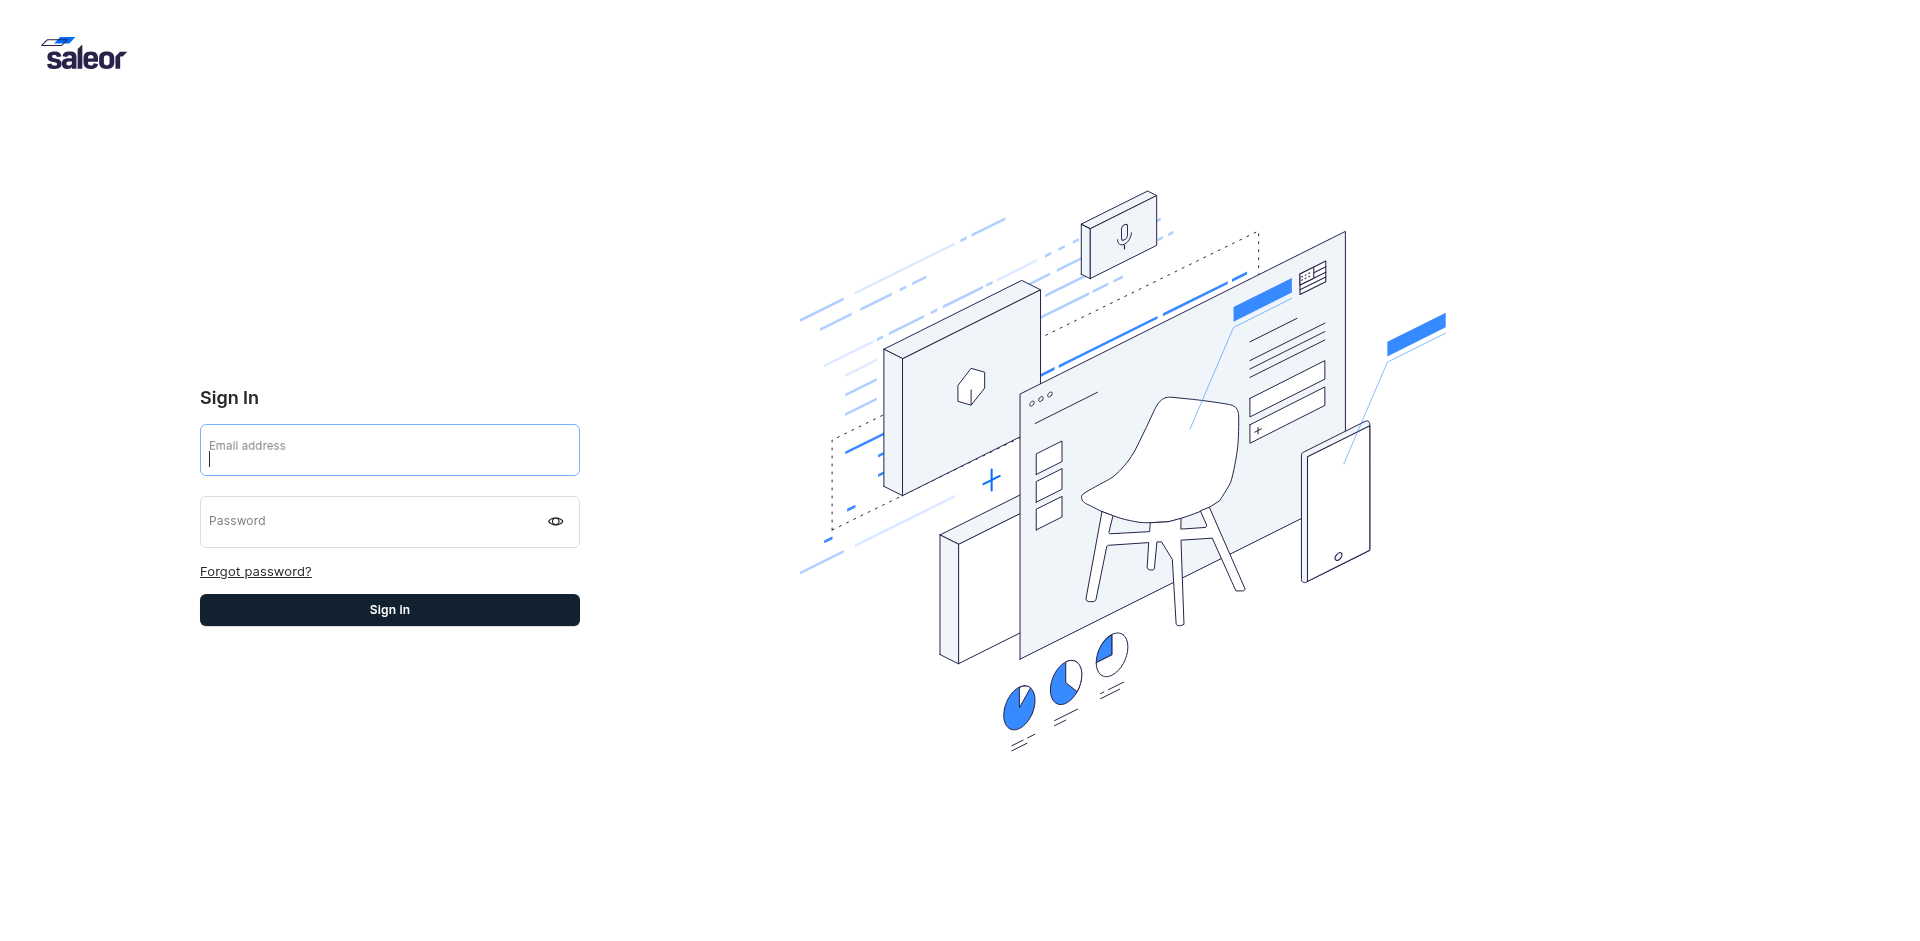

In [16]:
from IPython.display import Image
Image("Test-Case-Generation/screenshot.png")

In [13]:
from llama_index.core.llms import ChatMessage, TextBlock, ImageBlock
from llama_index.llms.openai import OpenAI

llm = OpenAI(model="gpt-4.1-mini", temperature=0.1, max_tokens=8192, request_timeout=500)

messages = [
    ChatMessage(
        role="user",
        blocks=[
            ImageBlock(path="Test-Case-Generation/screenshot.png"),
            TextBlock(text="Create test cases from the following screenshot."),
        ],
    )
]

resp = llm.chat(messages)

In [14]:
display(Markdown(resp.message.blocks[0].text))

Based on the provided login screen screenshot, here are some test cases:

### Test Cases for Sign In Page

#### 1. Verify UI Elements
- **Test Case ID:** TC_UI_001
- **Description:** Verify that all UI elements are present on the Sign In page.
- **Steps:**
  1. Open the Sign In page.
- **Expected Result:** Email address field, Password field, "Forgot password?" link, and Sign In button are displayed.

#### 2. Verify Email Address Field Accepts Input
- **Test Case ID:** TC_INPUT_001
- **Description:** Verify that the Email address field accepts valid input.
- **Steps:**
  1. Enter a valid email address in the Email address field.
- **Expected Result:** The email address is accepted and displayed in the field.

#### 3. Verify Password Field Accepts Input
- **Test Case ID:** TC_INPUT_002
- **Description:** Verify that the Password field accepts input and masks the characters.
- **Steps:**
  1. Enter a password in the Password field.
- **Expected Result:** The password is accepted and characters are masked (hidden).

#### 4. Verify Password Visibility Toggle
- **Test Case ID:** TC_FUNC_001
- **Description:** Verify that clicking the eye icon toggles password visibility.
- **Steps:**
  1. Enter a password.
  2. Click the eye icon.
- **Expected Result:** Password visibility toggles between masked and visible.

#### 5. Verify Sign In Button is Disabled When Fields are Empty
- **Test Case ID:** TC_FUNC_002
- **Description:** Verify that the Sign In button is disabled when Email or Password fields are empty.
- **Steps:**
  1. Leave Email and Password fields empty.
- **Expected Result:** Sign In button is disabled or does not proceed.

#### 6. Verify Sign In with Valid Credentials
- **Test Case ID:** TC_AUTH_001
- **Description:** Verify that user can sign in with valid email and password.
- **Steps:**
  1. Enter valid email address.
  2. Enter valid password.
  3. Click Sign In button.
- **Expected Result:** User is successfully signed in and redirected to the dashboard or home page.

#### 7. Verify Sign In with Invalid Credentials
- **Test Case ID:** TC_AUTH_002
- **Description:** Verify that user cannot sign in with invalid email or password.
- **Steps:**
  1. Enter invalid email or password.
  2. Click Sign In button.
- **Expected Result:** Error message is displayed indicating invalid credentials.

#### 8. Verify Forgot Password Link
- **Test Case ID:** TC_NAV_001
- **Description:** Verify that clicking "Forgot password?" link navigates to the password recovery page.
- **Steps:**
  1. Click on "Forgot password?" link.
- **Expected Result:** User is redirected to the password recovery/reset page.

#### 9. Verify Email Field Validation
- **Test Case ID:** TC_VALID_001
- **Description:** Verify that the Email field validates the input format.
- **Steps:**
  1. Enter invalid email formats (e.g., "user@", "user.com", "user@com").
  2. Attempt to sign in.
- **Expected Result:** Validation error message is displayed for invalid email format.

#### 10. Verify Password Field Validation
- **Test Case ID:** TC_VALID_002
- **Description:** Verify that the Password field enforces any password rules (if applicable).
- **Steps:**
  1. Enter a password that does not meet the criteria (if any).
  2. Attempt to sign in.
- **Expected Result:** Validation error message is displayed for invalid password.

---

If you want, I can also help generate automated test scripts for these cases.

#### Using pre-fetched screenshots

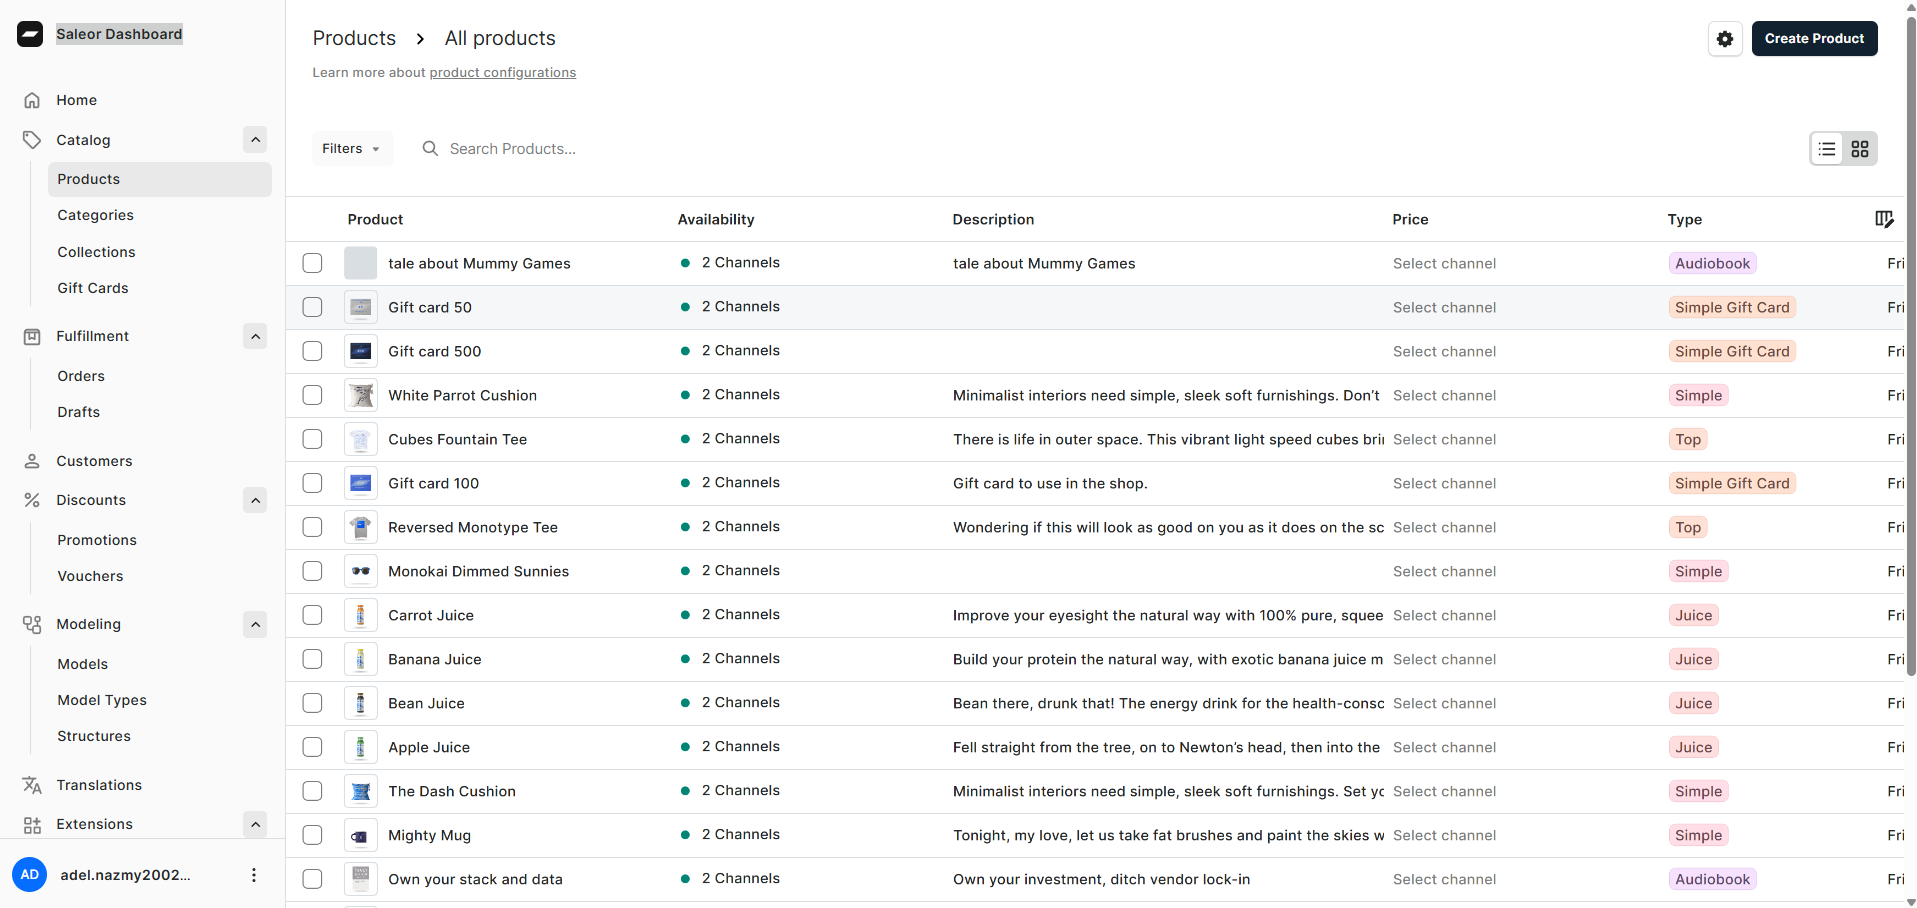

In [17]:
Image("Test-Case-Generation/Screenshot 2025-06-27 101226.png")

In [18]:
messages = [
    ChatMessage(
    role="system",
    blocks=[TextBlock(text="You are an expert test engineer who excels in creating test cases for web products")]
    ),
    ChatMessage(
        role="user",
        blocks=[
            ImageBlock(path="Test-Case-Generation/Screenshot 2025-06-27 101226.png"),
            TextBlock(text="Create test cases from the following screenshot."),
        ],
    )
]

resp = llm.chat(messages)

In [19]:
display(Markdown(resp.message.blocks[0].text))

Here are detailed test cases based on the provided screenshot of the "Products" page in the Saleor Dashboard:

---

### Test Case 1: Verify Navigation to Products Page
- **Precondition:** User is logged into Saleor Dashboard.
- **Steps:**
  1. Click on "Catalog" in the left sidebar.
  2. Click on "Products" under Catalog.
- **Expected Result:** The "Products" page is displayed with the list of products.

---

### Test Case 2: Verify Product List Display
- **Precondition:** User is on the Products page.
- **Steps:**
  1. Observe the product list table.
- **Expected Result:** The table displays columns: Product, Availability, Description, Price, Type.
  - Each product row shows product image, name, availability channels, description, price status, and type tag.

---

### Test Case 3: Verify Product Selection Checkbox
- **Precondition:** User is on the Products page.
- **Steps:**
  1. Click the checkbox next to any product.
- **Expected Result:** The checkbox is selected, indicating the product is selected.

---

### Test Case 4: Verify Search Products Functionality
- **Precondition:** User is on the Products page.
- **Steps:**
  1. Enter a product name or keyword in the "Search Products..." input field.
  2. Press Enter or click search icon.
- **Expected Result:** The product list filters to show only products matching the search term.

---

### Test Case 5: Verify Filters Dropdown
- **Precondition:** User is on the Products page.
- **Steps:**
  1. Click on the "Filters" dropdown button.
- **Expected Result:** Filter options are displayed for refining the product list.

---

### Test Case 6: Verify Product Type Tags Display
- **Precondition:** User is on the Products page.
- **Steps:**
  1. Observe the "Type" column for each product.
- **Expected Result:** Each product has a type tag such as "Audiobook," "Simple Gift Card," "Simple," "Top," or "Juice" displayed with distinct background colors.

---

### Test Case 7: Verify Availability Channels Display
- **Precondition:** User is on the Products page.
- **Steps:**
  1. Observe the "Availability" column for each product.
- **Expected Result:** Each product shows "2 Channels" with a green dot indicating availability.

---

### Test Case 8: Verify Price Column Placeholder
- **Precondition:** User is on the Products page.
- **Steps:**
  1. Observe the "Price" column for each product.
- **Expected Result:** The price field shows "Select channel" as a placeholder for all products.

---

### Test Case 9: Verify Create Product Button
- **Precondition:** User is on the Products page.
- **Steps:**
  1. Click the "Create Product" button on the top right.
- **Expected Result:** User is navigated to the product creation page.

---

### Test Case 10: Verify Breadcrumb Navigation
- **Precondition:** User is on the Products page.
- **Steps:**
  1. Click on "Products" in the breadcrumb navigation.
- **Expected Result:** The page refreshes or remains on the Products page.

---

### Test Case 11: Verify Product Description Text Display
- **Precondition:** User is on the Products page.
- **Steps:**
  1. Observe the "Description" column for each product.
- **Expected Result:** Product descriptions are displayed correctly, truncated with ellipsis if too long.

---

### Test Case 12: Verify Sidebar Menu Expand/Collapse
- **Precondition:** User is on the Saleor Dashboard.
- **Steps:**
  1. Click the expand/collapse arrows next to "Catalog," "Fulfillment," "Discounts," "Modeling," and "Extensions."
- **Expected Result:** The respective menu sections expand or collapse accordingly.

---

### Test Case 13: Verify Product Image Display
- **Precondition:** User is on the Products page.
- **Steps:**
  1. Observe the product images in the product list.
- **Expected Result:** Each product has a corresponding image or placeholder displayed correctly.

---

### Test Case 14: Verify Scroll Functionality
- **Precondition:** User is on the Products page with many products.
- **Steps:**
  1. Scroll down the product list.
- **Expected Result:** The product list scrolls smoothly, and all products are accessible.

---

These test cases cover the main UI elements and functionalities visible in the screenshot. Let me know if you want test cases for specific interactions or edge cases!

## 3. **AI-Driven Test Data Generation:** Generate synthetic test data for diverse testing scenarios.

In [41]:
from llama_index.core.memory import ChatMemoryBuffer

# Create a chat memory buffer to store conversation history
chat_memory = ChatMemoryBuffer.from_defaults(token_limit=4096)

# Example: add the current messages to memory
for msg in resp:
    chat_memory.put(msg)


In [42]:
# Use the chat history stored in chat_memory to generate synthetic test data with the LLM

# Prepare a new prompt using the chat history as context
history_text = "\n\n".join(
    block.text
    for entry in chat_memory.chat_store.store['chat_history']
    if isinstance(entry, tuple) and hasattr(entry[1], "blocks")
    for block in entry[1].blocks
    if hasattr(block, "text")
)

data_prompt = [
    ChatMessage(
        role="system",
        blocks=[TextBlock(text="You are an expert test data generator for QA. Based on the following test cases, generate a table of synthetic test data suitable for automated testing. Include edge cases and realistic values.")]
    ),
    ChatMessage(
        role="user",
        blocks=[TextBlock(text=history_text)]
    ),
]

data_resp = llm.chat(data_prompt)
display(Markdown(data_resp.message.blocks[0].text))

| Product Name           | Product Image URL                      | Availability Channels | Description                                               | Price Status       | Product Type       | Checkbox Selected | Search Keywords                  | Notes / Edge Cases                                      |
|-----------------------|--------------------------------------|-----------------------|-----------------------------------------------------------|--------------------|--------------------|-------------------|---------------------------------|--------------------------------------------------------|
| Audiobook: Learn Python| https://example.com/images/python.jpg| 2                     | Comprehensive guide to Python programming.                | Select channel     | Audiobook          | false             | python, audiobook               | Normal case with typical data                           |
| Gift Card $50          | https://example.com/images/giftcard.jpg| 2                     | Gift card valid for all products.                         | Select channel     | Simple Gift Card    | false             | gift card, card, $50            | Price as gift card, no fixed price                      |
| Simple T-Shirt         | https://example.com/images/tshirt.jpg| 2                     | 100% cotton, available in all sizes.                      | Select channel     | Simple             | false             | tshirt, simple, cotton          | Normal simple product                                   |
| Top Seller Juice       | https://example.com/images/juice.jpg | 2                     | Freshly squeezed orange juice, best seller.               | Select channel     | Juice              | false             | juice, orange, top seller       | Product with "Top" tag and type "Juice"                |
| Long Description Book  | https://example.com/images/book.jpg  | 2                     | This book covers advanced topics in software engineering, including design patterns, testing, and deployment strategies... | Select channel     | Simple             | false             | book, software, engineering     | Description longer than typical, tests ellipsis        |
| No Image Product       | null                                 | 2                     | Product without an image, placeholder should appear.      | Select channel     | Simple             | false             | no image, placeholder           | Edge case: missing image                                |
| Zero Availability Prod | https://example.com/images/zero.jpg  | 0                     | Product currently unavailable in any channel.             | Select channel     | Simple             | false             | zero availability, unavailable  | Edge case: zero availability channels                   |
| Max Length Name Prod   | https://example.com/images/maxname.jpg| 2                     | Product with maximum allowed name length for UI testing.  | Select channel     | Simple             | false             | max length, long name           | Edge case: very long product name                        |
| Special Chars Prod!@#  | https://example.com/images/special.jpg| 2                     | Product with special characters in name and description.  | Select channel     | Simple             | false             | special chars, !@#              | Edge case: special characters in text                   |
| Price Zero Product     | https://example.com/images/free.jpg  | 2                     | Free sample product with zero price.                       | Select channel     | Simple             | false             | free, zero price                | Edge case: zero price product                            |
| Selected Product       | https://example.com/images/selected.jpg| 2                     | Product that will be selected in checkbox test.           | Select channel     | Simple             | true              | selected, checkbox              | Checkbox selected to test selection functionality       |
| Multi-word Search Prod | https://example.com/images/multiword.jpg| 2                     | Product to test multi-word search functionality.          | Select channel     | Simple             | false             | multi word, search test         | Tests search with multiple keywords                     |
| Empty Description Prod | https://example.com/images/emptydesc.jpg| 2                     |                                                           | Select channel     | Simple             | false             | empty description              | Edge case: empty description field                      |
| Null Description Prod  | https://example.com/images/nulldesc.jpg| 2                     | null                                                      | Select channel     | Simple             | false             | null description              | Edge case: null description value                       |
| Large Number Price Prod| https://example.com/images/largeprice.jpg| 2                     | Product with very large price value for UI display test.  | Select channel     | Simple             | false             | large price, expensive          | Edge case: very large price value                       |

**Notes:**

- **Product Image URL:** Use valid URLs or null to test placeholder.
- **Availability Channels:** Mostly 2, with one zero to test edge case.
- **Price Status:** Always "Select channel" placeholder as per test case 8.
- **Product Type:** Includes all types mentioned: Audiobook, Simple Gift Card, Simple, Top, Juice.
- **Checkbox Selected:** One product with checkbox selected true to test selection.
- **Search Keywords:** Keywords to test search functionality.
- **Description:** Includes normal, long, empty, and null descriptions to test display and truncation.
- **Edge Cases:** Long names, special characters, zero availability, no image, zero price, large price.

This dataset supports automated testing of UI elements, filtering, searching, selection, and display edge cases on the Products page.

In [45]:
messages 

[ChatMessage(role=<MessageRole.SYSTEM: 'system'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='You are an expert test engineer who excels in creating test cases for web products')]),
 ChatMessage(role=<MessageRole.USER: 'user'>, additional_kwargs={}, blocks=[ImageBlock(block_type='image', image=None, path=PosixPath('Test-Case-Generation/Screenshot 2025-06-27 101226.png'), url=None, image_mimetype='image/png', detail=None), TextBlock(block_type='text', text='Create test cases from the following screenshot.')])]

### Using Local Model to generate test cases via vision 

In [46]:
from llama_index.llms.ollama import Ollama

llm= Ollama(model="gemma3:12b", temperature=0.1,context_window=16384,request_timeout=500)
gen=llm.stream_chat(messages=messages)

In [47]:
stream_output = display(Markdown(""), display_id=True)  # Empty initial display
full_response = ""

for response in gen:
    full_response += response.delta
    stream_output.update(Markdown(full_response))  # Update the same output
    time.sleep(0.01)  # Small delay for smoother rendering

Okay, let's craft some test cases based on this screenshot of the "All Products" page in a sales dashboard. I'm focusing on the visible elements and functionality. I'm going to break them down into categories (UI, Data Display, Actions) and provide a mix of positive and negative test cases.  I'll also include priority levels (P1 - Critical, P2 - High, P3 - Medium, P4 - Low).

**Assumptions:**

*   This is a web application.
*   "Channels" likely refers to distribution channels (e.g., different regions, stores).
*   The "Create Product" button is functional.
*   The checkboxes are for selecting products (likely for bulk actions).
*   The "Search Products" bar is functional.
*   The filters are functional.

**I. UI/Layout & Display Test Cases**

| Test Case ID | Description | Priority | Steps | Expected Result | Pass/Fail | Notes |
|---|---|---|---|---|---|---|
| UI-001 | Verify Product List Display | P1 | Navigate to "Products > All Products". | Products are displayed in a clear, readable list format.  Column headers (Product, Availability, Description, Price, Type) are visible and understandable. |  |  |
| UI-002 | Verify Column Widths | P3 | Resize the browser window. | Column widths adjust appropriately to prevent overflow or excessive scrolling. |  |  |
| UI-003 | Verify Font Sizes | P4 | Zoom in/out of the browser. | Font sizes scale reasonably well.  No text is cut off or becomes illegible. |  |  |
| UI-004 | Verify Header Visibility | P2 | Scroll vertically. | Column headers remain visible or "stick" to the top of the screen. |  |  |
| UI-005 | Verify Search Bar Placement | P3 | Navigate to the page. | Search bar is prominently displayed and easily accessible. |  |  |
| UI-006 | Verify Filter Visibility | P3 | Navigate to the page. | Filters are visible and accessible. |  |  |

**II. Data Display Test Cases**

| Test Case ID | Description | Priority | Steps | Expected Result | Pass/Fail | Notes |
|---|---|---|---|---|---|---|
| DATA-001 | Verify Product Name Display | P1 | Navigate to "Products > All Products". | Product names are displayed correctly and completely. |  |  |
| DATA-002 | Verify Availability Display | P1 | Navigate to "Products > All Products". | Availability is displayed accurately (e.g., "2 Channels"). |  |  |
| DATA-003 | Verify Description Display | P2 | Navigate to "Products > All Products". | Product descriptions are displayed correctly and completely.  Truncation is handled gracefully (if applicable). |  |  |
| DATA-004 | Verify Price Display | P2 | Navigate to "Products > All Products". | Price is displayed correctly, including currency symbol (if applicable). |  |  |
| DATA-005 | Verify Product Type Display | P2 | Navigate to "Products > All Products". | Product type is displayed correctly (e.g., "Audiobook", "Simple Gift Card", "Juice"). |  |  |
| DATA-006 | Verify Data Consistency | P3 | Compare data displayed in the list with the data stored in the database (if accessible). | Data matches between the UI and the underlying data source. |  | Requires backend access |
| DATA-007 | Verify Empty State | P4 | If there were no products, verify the page displays a user-friendly "no products" message. |  |  |

**III. Action/Functionality Test Cases**

| Test Case ID | Description | Priority | Steps | Expected Result | Pass/Fail | Notes |
|---|---|---|---|---|---|---|
| ACTION-001 | Verify "Create Product" Button | P1 | Click the "Create Product" button. | User is redirected to the product creation page. |  |  |
| ACTION-002 | Verify Checkbox Selection | P1 | Click a checkbox next to a product. | The checkbox is toggled (checked/unchecked).  The selected product is visually indicated. |  |  |
| ACTION-003 | Verify Search Functionality | P2 | Enter a valid product name in the search bar and press Enter. | The product list is filtered to show only products matching the search term. |  |  |
| ACTION-004 | Verify Search with No Results | P3 | Enter a search term that yields no results. | A "no results found" message is displayed. |  |  |
| ACTION-005 | Verify Filter Functionality | P3 | Apply a filter (e.g., by product type). | The product list is filtered to show only products matching the filter criteria. |  |  |
| ACTION-006 | Verify Filter Clearing | P3 | Clear a filter. | The product list reverts to its unfiltered state. |  |  |
| ACTION-007 | Verify Sorting (if available) | P4 | If sorting is available (e.g., by product name, price), verify that sorting works correctly. | Products are sorted in the expected order. |  |  |
| ACTION-008 | Verify "Select Channel" Functionality | P2 | Click the "Select Channel" dropdown for a product. | A list of available channels is displayed. Selecting a channel updates the product's channel assignment. |  | Requires backend access |

**Important Considerations & Next Steps:**

*   **Backend Integration:** Many of these test cases (especially those involving "Select Channel") require interaction with the backend system.  You'll need to coordinate with backend engineers.
*   **Edge Cases:** Consider edge cases like very long product names, special characters in descriptions, and invalid data in the database.
*   **Accessibility:**  Test for accessibility (e.g., keyboard navigation, screen reader compatibility).
*   **Performance:**  Consider performance testing, especially with a large number of products.
*   **Mobile Responsiveness:**  Test the page on different screen sizes and devices.
*   **Error Handling:**  Test how the application handles errors (e.g., database connection errors, invalid user input).



To help me refine these test cases further, could you tell me:

*   What is the purpose of the "Channels" column?
*   Are there any specific functionalities not visible in the screenshot that are important to test?
*   What is the overall goal of this page within the sales dashboard?

### Using Local Model to generate test data for generated test cases

In [48]:
#Markdown(data_prompt[1].blocks[0].text)
data_prompt

[ChatMessage(role=<MessageRole.SYSTEM: 'system'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='You are an expert test data generator for QA. Based on the following test cases, generate a table of synthetic test data suitable for automated testing. Include edge cases and realistic values.')]),
 ChatMessage(role=<MessageRole.USER: 'user'>, additional_kwargs={}, blocks=[TextBlock(block_type='text', text='Here are detailed test cases based on the provided screenshot of the "Products" page in the Saleor Dashboard:\n\n---\n\n### Test Case 1: Verify Navigation to Products Page\n- **Precondition:** User is logged into Saleor Dashboard.\n- **Steps:**\n  1. Click on "Catalog" in the left sidebar.\n  2. Click on "Products" under Catalog.\n- **Expected Result:** The "Products" page is displayed with the list of products.\n\n---\n\n### Test Case 2: Verify Product List Display\n- **Precondition:** User is on the Products page.\n- **Steps:**\n  1. Observe the product list table.\n

In [ ]:

data_resp = llm.chat(data_prompt)

In [ ]:

display(Markdown(data_resp.message.blocks[0].text))

Okay, here's a table of synthetic test data designed to cover the test cases you've outlined. I'm including a variety of data types, edge cases (like very long descriptions, special characters in names, etc.), and realistic values.  I'm also including notes on *why* certain data points are included.  This table is designed to be used with automated testing tools.

**Important Notes:**

*   **Channel IDs:**  The `channel_id` values are placeholders.  You're going to need to replace these with valid channel IDs from your Saleor environment.
*   **Image URLs:**  Similarly, the `image_url` values are placeholders.  You'll need to replace these with actual image URLs or paths.
*   **Data Types:**  I'm assuming Saleor uses standard data types (strings, integers, decimals, booleans).
*   **Localization:** This data is in English.  If your Saleor instance uses localization, you'll need to adapt the data accordingly.
*   **Data Volume:** The number of products in the table can be adjusted based on your testing needs.  More products will better test pagination and scrolling.

```
| Test Case | Product Name | Description | Price | Type | Availability Channels | Channel ID | Image URL | Notes |
|---|---|---|---|---|---|---|---|---|
| 2, 11 | "Saleor T-Shirt" | "Comfortable and stylish t-shirt for Saleor fans." | 25.00 | Simple | 2 Channels | "channel-001" | "https://example.com/saleor-tshirt.jpg" | Standard product |
| 2, 11 | "Audiobook: The Martian" | "A thrilling science fiction novel about survival on Mars." | 12.99 | Audiobook | 1 Channel | "channel-002" | "https://example.com/martian.jpg" | Audiobook type |
| 2, 11 | "Simple Gift Card - $50" | "A gift card for $50 to use on Saleor products." | 50.00 | Simple Gift Card | 3 Channels | "channel-003" | "https://example.com/giftcard.jpg" | Gift Card type |
| 2, 11 | "Juice - Mango" | "Delicious and refreshing mango juice." | 3.50 | Juice | 2 Channels | "channel-004" | "https://example.com/mango-juice.jpg" | Juice type |
| 2, 11 | "Top - Summer Dress" | "Elegant summer dress for warm weather." | 45.00 | Top | 1 Channel | "channel-005" | "https://example.com/summer-dress.jpg" | Top type |
| 2, 11 | "Product with Special Characters" | "This product has !@#$%^&*()_+=-`~[]\{}|;':\",./<>?" | 19.99 | Simple | 2 Channels | "channel-001" | "https://example.com/special-chars.jpg" | Tests special character handling |
| 2, 11 | "Very Long Product Name" | "This is a product name that is extremely long and will test the display limits of the product list. It's designed to see how Saleor handles long strings in the UI." | 10.00 | Simple | 2 Channels | "channel-002" | "https://example.com/long-name.jpg" | Tests long name display |
| 2, 11 | "Product with Empty Description" | "" | 5.00 | Simple | 2 Channels | "channel-003" | "https://example.com/empty-desc.jpg" | Tests empty description handling |
| 2, 11 | "Product with Zero Price" | "A free product for testing purposes." | 0.00 | Simple | 2 Channels | "channel-004" | "https://example.com/zero-price.jpg" | Tests zero price handling |
| 2, 11 | "Product with Decimal Price" | "Product with a price with many decimal places." | 123.456789 | Simple | 2 Channels | "channel-005" | "https://example.com/decimal-price.jpg" | Tests decimal price handling |
| 2, 11 | "Product with HTML in Description" | "This product has <b>HTML</b> in its description." | 20.00 | Simple | 2 Channels | "channel-001" | "https://example.com/html-desc.jpg" | Tests HTML handling in description |
| 2, 11 | "Product with Unicode Characters" | "产品名称包含 Unicode 字符." | 30.00 | Simple | 2 Channels | "channel-002" | "https://example.com/unicode.jpg" | Tests Unicode character handling |
| 2, 11 | "Product with Line Breaks" | "This product description\nhas line breaks.\nTesting line break rendering." | 15.00 | Simple | 2 Channels | "channel-003" | "https://example.com/line-breaks.jpg" | Tests line break rendering |
| 2, 11 | "Product with Very Long Description" | "This is a very long description that will test the truncation and ellipsis behavior of the product list. It's designed to see how Saleor handles long strings in the UI and how it truncates them with ellipsis.  This description is intentionally very long to push the limits of the display." | 8.00 | Simple | 2 Channels | "channel-004" | "https://example.com/very-long-desc.jpg" | Tests long description truncation |
| 2, 11 | "Product with Missing Image" | "This product has no image associated with it." | 7.00 | Simple | 2 Channels | "channel-005" | "" | Tests missing image handling (should show placeholder) |
| 2, 11 | "Product with Negative Price" | "This product has a negative price for testing purposes." | -5.00 | Simple | 2 Channels | "channel-001" | "https://example.com/negative-price.jpg" | Tests negative price handling |
| 2, 11 | "Product with a lot of channels" | "This product is available in many channels." | 22.00 | Simple | 5 Channels | "channel-002" | "https://example.com/many-channels.jpg" | Tests display of many channels |
```

**Notes for Automation:**

*   **Data Generation:**  You can use this table as a template to generate more data programmatically.
*   **Randomization:**  Introduce randomization into the data generation process to create more diverse test cases.
*   **Edge Case Prioritization:**  Focus on the edge cases first to identify potential issues early on.
*   **Database Seeding:**  Consider using this data to seed your Saleor test database.
*   **Channel IDs:**  *Crucially*, replace the placeholder `channel_id` values with valid IDs from your Saleor environment.

This comprehensive table should provide a solid foundation for your automated testing efforts. Remember to adapt it to your specific Saleor environment and testing requirements. Let me know if you have any other questions.

In [ ]:
from llama_index.llms.ollama import Ollama
from llama_index.core.response_synthesizers import get_response_synthesizer
from llama_index.core.prompts import BasePromptTemplate 
from IPython.display import Markdown

# Initialize LLM
llm = Ollama(model="gemma3:12b", temperature=0.1, context_window=16384, request_timeout=500)

template_str = "You are an expert test data generator for QA. Based on the following test cases, generate a table of synthetic test data suitable for automated testing. Include edge cases and realistic values, make sure outpur is in correct markdown format"

template= BasePromptTemplate(template_str)

# Option 1: Simple chat with markdown display
data_resp = llm.chat(data_prompt)
display(Markdown(f"```markdown\n{data_resp.message.content}\n```"))


# Option 2: Using response synthesizer for more control
response_synthesizer = get_response_synthesizer(llm=llm,refine_template=template, streaming=False)
synthesized_response = response_synthesizer.synthesize(data_prompt, messages)

# For streaming version
gen = llm.stream_chat(messages=messages)
for chunk in gen:
    display(Markdown(f"```markdown\n{chunk.message.content}\n```"))

# Scratch Book


In [ ]:
!huggingface-cli login

In [5]:
from llama_index.multi_modal_llms.huggingface import HuggingFaceMultiModal
from llama_index.core.schema import ImageDocument

# Initialize the model
model = HuggingFaceMultiModal.from_model_name("google/gemma-3n-E2B-it")

# Prepare your image and prompt
image_document = ImageDocument(image_path="Test-Case-Generation/Screenshot 2025-06-27 101226.png")
prompt = "Describe this image in detail."

# Generate a response
response = model.complete(prompt, image_documents=[image_document])

print(response.text)

ValueError: Unsupported model architecture: Gemma3nForConditionalGeneration. We currently support: Phi3VForCausalLM, Florence2ForConditionalGeneration, Qwen2VLForConditionalGeneration, PaliGemmaForConditionalGeneration, MllamaForConditionalGeneration